In [3]:
a = pd.read_csv('Employee Data.csv')
a.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


In [4]:
print(a.shape)

(10000, 10)


In [5]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  object 
 3   marital_status   10000 non-null  object 
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  object 
 6   region           10000 non-null  object 
 7   has_dependents   10000 non-null  object 
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB
None


In [6]:
# no missing values 
print(a.isnull().sum())

employee_id        0
age                0
gender             0
marital_status     0
salary             0
employment_type    0
region             0
has_dependents     0
tenure_years       0
enrolled           0
dtype: int64


In [7]:
a.value_counts('enrolled')

enrolled
1    6174
0    3826
Name: count, dtype: int64

In [8]:
a = a.drop('employee_id', axis=1)



In [9]:
a.head()

,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


In [10]:
a['has_dependents'] = a['has_dependents'].map({'Yes':1, 'No':0})

#one hot encoding categorical columns 
a_encoded = pd.get_dummies(a, columns=['gender', 'marital_status', 'employment_type', 'region'], drop_first=True)

   age    salary  has_dependents  tenure_years  enrolled  gender_Male  \
0   60  55122.97               0           1.5         0        False   
1   50  89549.66               1          12.8         1        False   
2   36  74145.66               0           3.8         0         True   
3   64  53877.83               0           3.3         0        False   
4   29  63404.63               1          10.0         0         True   

   gender_Other  marital_status_Married  marital_status_Single  \
0         False                   False                   True   
1         False                   False                   True   
2         False                   False                  False   
3         False                    True                  False   
4         False                   False                   True   

   marital_status_Widowed  employment_type_Full-time  \
0                   False                      False   
1                   False                       True

In [17]:
a_encoded.head()

,age,salary,has_dependents,tenure_years,enrolled,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_type_Full-time,employment_type_Part-time,region_Northeast,region_South,region_West
0,60,55122.97,0,1.5,0,False,False,False,True,False,False,True,False,False,True
1,50,89549.66,1,12.8,1,False,False,False,True,False,True,False,False,False,True
2,36,74145.66,0,3.8,0,True,False,False,False,False,False,True,False,False,False
3,64,53877.83,0,3.3,0,False,False,True,False,False,True,False,True,False,False
4,29,63404.63,1,10.0,0,True,False,False,True,False,False,False,False,False,False


In [23]:
X = a_encoded.drop('enrolled', axis=1)  # features
y = a['enrolled']              # target

In [21]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: enrolled, dtype: int64

In [24]:

from sklearn.preprocessing import StandardScaler

# List numeric columns
numeric_cols = ['age', 'salary', 'tenure_years']

# Initialize scaler
scaler = StandardScaler()

# Scale only numeric columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [25]:
X.head()

,age,salary,has_dependents,tenure_years,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_type_Full-time,employment_type_Part-time,region_Northeast,region_South,region_West
0,1.383618,-0.664066,0,-0.633513,False,False,False,True,False,False,True,False,False,True
1,0.569629,1.642856,1,2.267423,False,False,False,True,False,True,False,False,False,True
2,-0.569955,0.610639,0,-0.043057,True,False,False,False,False,False,True,False,False,False
3,1.709213,-0.747502,0,-0.171417,False,False,True,False,False,True,False,True,False,False
4,-1.139747,-0.109114,1,1.548607,True,False,False,True,False,False,False,False,False,False


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to keep balance
)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       765
           1       0.91      0.92      0.92      1235

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00      1235

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



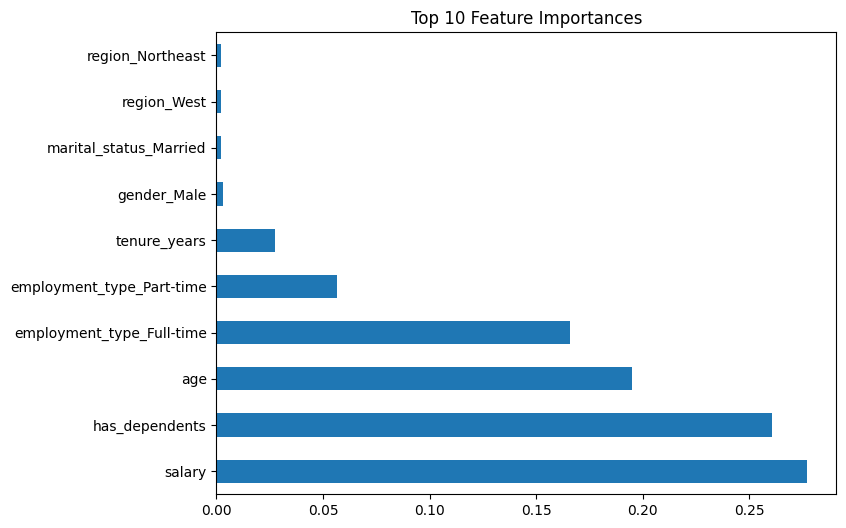

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# 1. Train RandomForest with class balancing
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 2. Predict
y_pred_rf = rf.predict(X_test)

# 3. Evaluate
print(classification_report(y_test, y_pred_rf))

# 4. Feature importance plot
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Feature Importances')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9998750039403604


In [33]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("insurance-enrollment")

with mlflow.start_run():
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    # Log model
    mlflow.sklearn.log_model(model, "rf_model")
    
    # Log metrics
    from sklearn.metrics import f1_score
    mlflow.log_metric("f1_weighted", f1_score(y_test, preds, average='weighted'))

2025/05/06 11:59:41 INFO mlflow.tracking.fluent: Experiment with name 'insurance-enrollment' does not exist. Creating a new experiment.
2025/05/06 11:59:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
